<a href="https://colab.research.google.com/github/manlio99/DeTodoUnPoco/blob/main/Tp2_1_manlio_massiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

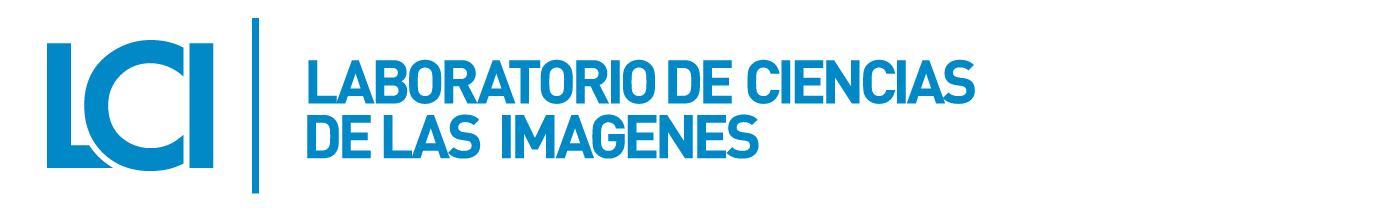

# Trabajo practico N°2
## Ejercicio 1

Con extras.

Primero importamos los dataset proporcionados por la municipalidad de bahía blanca, extrayendo los datos directamente de su pag web.



In [1]:
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup

# Descargar datos actuales
Diferentes a los inicialmente proporcionados

In [2]:
def read_web_bahia(url = 'https://gobiernoabierto.bahia.gob.ar/WS/3032'):
    # from https://stackoverflow.com/questions/53398785/pandas-read-html-valueerror-no-tables-found
    
    res = requests.get(url)
    soup = BeautifulSoup(res.content, "lxml")
    s = soup.select('html')[0].text.strip('jQuery1720724027235122559_1542743885014(').strip(')')
    s = s.replace('null','"placeholder"')
    data= json.loads(s)
    data = json_normalize(data)
    df = pd.DataFrame(data)
    print(df)
    return df

In [3]:
import pandas as pd
import requests
 
Casos_covid_Bahia_url = 'https://gobiernoabierto.bahia.gob.ar/WS/3032'
Casos_covid_Bahia_df = read_web_bahia(Casos_covid_Bahia_url)
Casos_covid_Bahia_df['fecha'] = pd.to_datetime(Casos_covid_Bahia_df['fecha'])
# Casos_covid_Bahia_df.describe()

          fecha  confirmados  ...  aislamiento_por_contacto_estrecho  aprehendidos
0    2020-03-19            0  ...                                  0             0
1    2020-03-20            0  ...                                  0            31
2    2020-03-21            1  ...                                  8            73
3    2020-03-22            1  ...                                  0            71
4    2020-03-23            3  ...                                  0            64
..          ...          ...  ...                                ...           ...
542  2021-09-12        45319  ...                                164             0
543  2021-09-13        45351  ...                                152             0
544  2021-09-14        45367  ...                                151             0
545  2021-09-15        45387  ...                                135             0
546  2021-09-16        45405  ...                                137             0

[54

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


In [4]:

Camas_covid_Bahia_url = 'https://gobiernoabierto.bahia.gob.ar/WS/3028'
Camas_covid_Bahia_df = read_web_bahia(Camas_covid_Bahia_url) 
Camas_covid_Bahia_df['fecha'] = pd.to_datetime(Camas_covid_Bahia_df['fecha'])
# Camas_covid_Bahia_df.describe()
Camas_covid_Bahia_df

      id       fecha  intensivostotal  ...  ucmasedes  ucmatotal  ucmaocupadas
0    128  2021-09-17               83  ...          2         80             0
1    127  2021-09-16               81  ...          2         80             0
2    126  2021-09-15               81  ...          2         80             0
3    125  2021-09-14               82  ...          2         80             0
4    124  2021-09-13               81  ...          2         80             0
..   ...         ...              ...  ...        ...        ...           ...
122    5  2021-05-18               72  ...          3        102            11
123    4  2021-05-17               81  ...          3        102            11
124    3  2021-05-16              100  ...          3        102            11
125    2  2021-05-15              107  ...          3        102            11
126    1  2021-05-14              107  ...          3        102            14

[127 rows x 17 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,id,fecha,intensivostotal,intensivosocupadas,intensivosconfirmados,intensivossospechosos,intermediostotal,intermediosocupadas,intermediosconfirmados,intermediossospechosos,minimostotal,minimosocupadas,minimosconfirmados,minimossospechosos,ucmasedes,ucmatotal,ucmaocupadas
0,128,2021-09-17,83,36,3,1,325,152,2,8,419,219,3,6,2,80,0
1,127,2021-09-16,81,32,3,1,325,146,4,3,417,220,2,5,2,80,0
2,126,2021-09-15,81,29,4,2,325,160,3,6,417,237,2,4,2,80,0
3,125,2021-09-14,82,34,3,2,325,159,4,3,414,232,2,3,2,80,0
4,124,2021-09-13,81,33,2,1,325,144,4,3,413,190,4,1,2,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,5,2021-05-18,72,49,32,0,217,134,47,6,330,209,54,8,3,102,11
123,4,2021-05-17,81,55,36,1,208,128,37,11,330,197,54,11,3,102,11
124,3,2021-05-16,100,69,44,1,191,118,33,8,331,196,61,9,3,102,11
125,2,2021-05-15,107,77,50,1,185,111,25,6,337,193,58,8,3,102,11


# Series Temporales.
Recordar plotear siempre contra el tiempo!


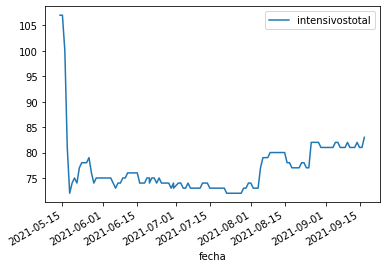

In [5]:
Camas_covid_Bahia_df.plot.line(y="intensivostotal", x="fecha")

# Recuerda Unir los Datasets, FUNCION MERGE!

In [6]:
df = pd.merge(Casos_covid_Bahia_df, Camas_covid_Bahia_df,  how='inner', on=["fecha"])
df

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos,id,intensivostotal,intensivosocupadas,intensivosconfirmados,intensivossospechosos,intermediostotal,intermediosocupadas,intermediosconfirmados,intermediossospechosos,minimostotal,minimosocupadas,minimosconfirmados,minimossospechosos,ucmasedes,ucmatotal,ucmaocupadas
0,2021-05-14,25762,3126,22116,520,0,0,0,1106,0,0,1,107,79,50,2,185,122,24,10,337,202,56,9,3,102,14
1,2021-05-15,25894,3043,22328,523,0,0,0,1106,0,0,2,107,77,50,1,185,111,25,6,337,193,58,8,3,102,11
2,2021-05-16,26102,2943,22634,525,0,0,0,1101,0,0,3,100,69,44,1,191,118,33,8,331,196,61,9,3,102,11
3,2021-05-17,26648,3245,22877,526,0,0,0,1101,0,0,4,81,55,36,1,208,128,37,11,330,197,54,11,3,102,11
4,2021-05-18,26967,3291,23141,535,0,0,0,1099,0,0,5,72,49,32,0,217,134,47,6,330,209,54,8,3,102,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2021-09-12,45319,359,44070,890,0,0,0,0,164,0,123,81,34,3,1,325,145,3,4,413,187,5,1,2,80,0
122,2021-09-13,45351,343,44118,890,0,0,0,0,152,0,124,81,33,2,1,325,144,4,3,413,190,4,1,2,80,0
123,2021-09-14,45367,310,44167,890,0,0,0,0,151,0,125,82,34,3,2,325,159,4,3,414,232,2,3,2,80,0
124,2021-09-15,45387,295,44201,891,0,0,0,0,135,0,126,81,29,4,2,325,160,3,6,417,237,2,4,2,80,0


# Plot de todas las columnas con respecto al tiempo

remarcamos que son diferentes al ejemplo original.

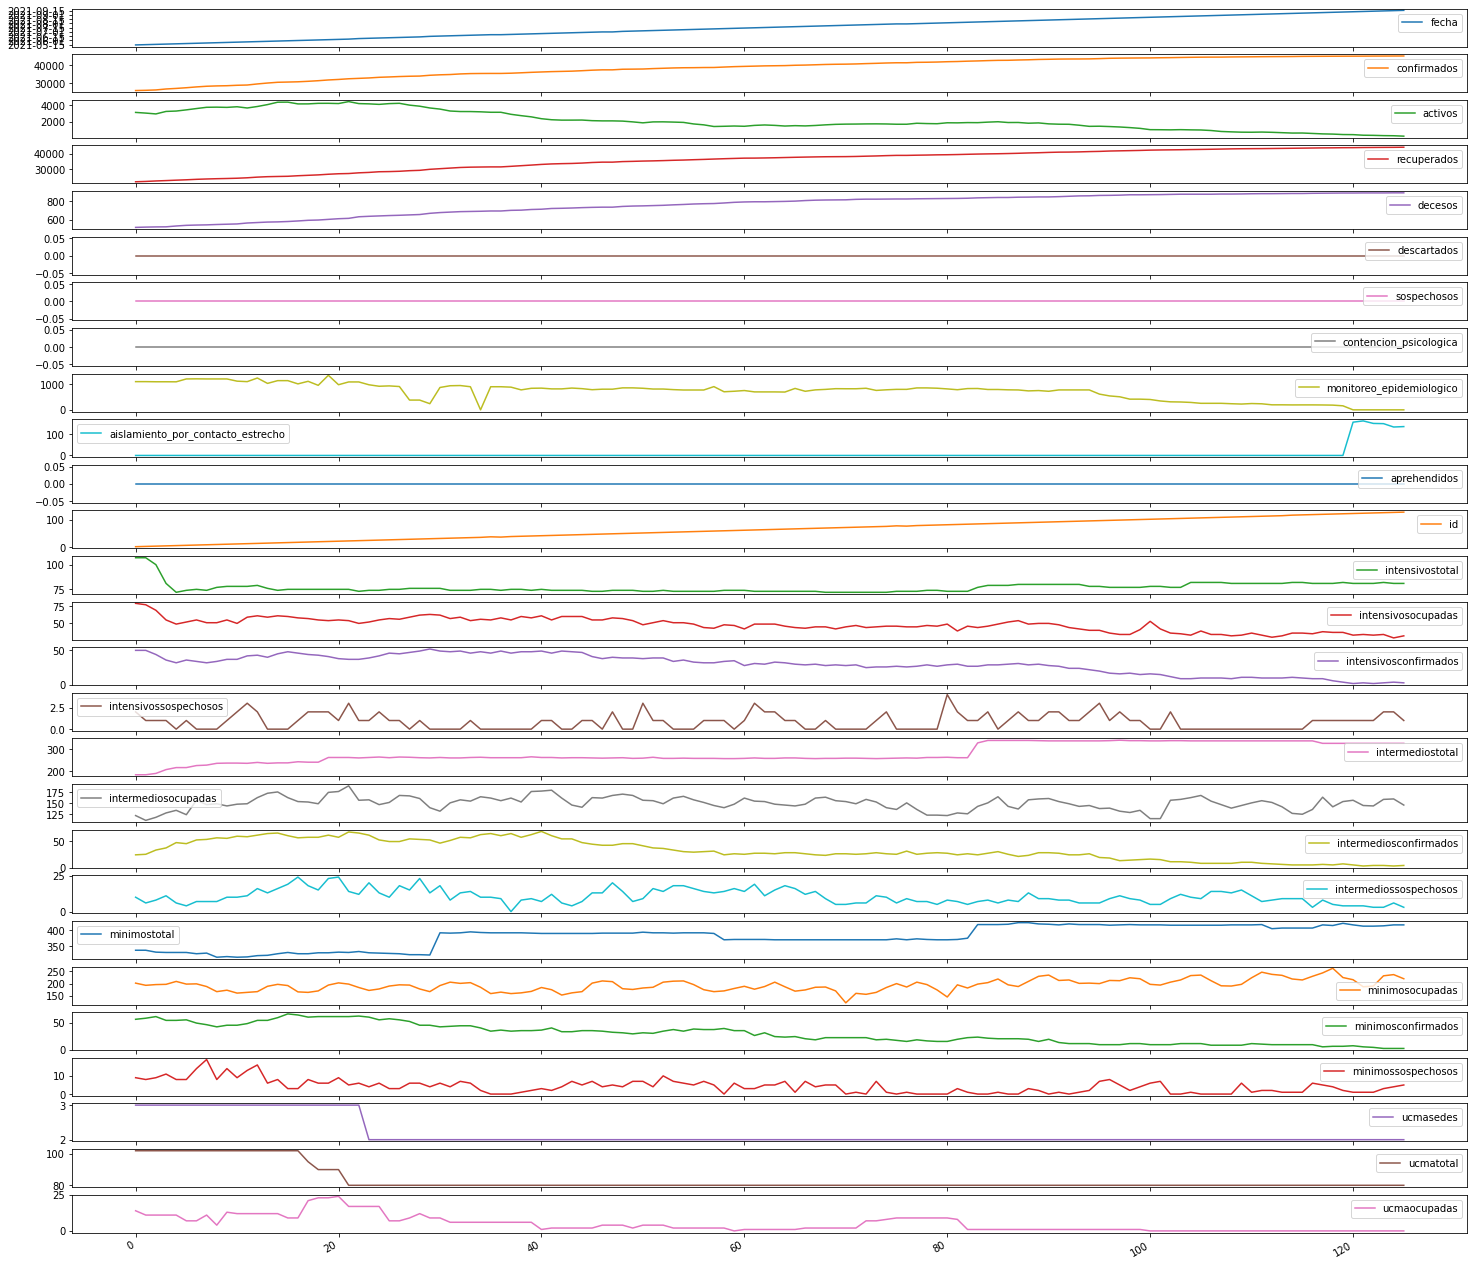

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# df.set_index('fecha', inplace=True)
df.plot(label='fecha', subplots=True,figsize=(25,25))
plt.show()
#falta reescalar las y axis.

# fbprophet
https://facebook.github.io/prophet/docs/quick_start.html

In [8]:
import fbprophet

In [9]:
# Prophet requires columns ds (Date) and y (value)
#cut 1 weeks to generate train and test data
N=7

df_todo = df.copy()
df_todo_train = df_todo.iloc[:-N , :]
df_todo_train.head()

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos,id,intensivostotal,intensivosocupadas,intensivosconfirmados,intensivossospechosos,intermediostotal,intermediosocupadas,intermediosconfirmados,intermediossospechosos,minimostotal,minimosocupadas,minimosconfirmados,minimossospechosos,ucmasedes,ucmatotal,ucmaocupadas
0,2021-05-14,25762,3126,22116,520,0,0,0,1106,0,0,1,107,79,50,2,185,122,24,10,337,202,56,9,3,102,14
1,2021-05-15,25894,3043,22328,523,0,0,0,1106,0,0,2,107,77,50,1,185,111,25,6,337,193,58,8,3,102,11
2,2021-05-16,26102,2943,22634,525,0,0,0,1101,0,0,3,100,69,44,1,191,118,33,8,331,196,61,9,3,102,11
3,2021-05-17,26648,3245,22877,526,0,0,0,1101,0,0,4,81,55,36,1,208,128,37,11,330,197,54,11,3,102,11
4,2021-05-18,26967,3291,23141,535,0,0,0,1099,0,0,5,72,49,32,0,217,134,47,6,330,209,54,8,3,102,11


In [10]:
df_todo_train["ds"] = df_todo_train['fecha']
df_todo_train["y"] = df_todo_train['activos']*1.0
df_todo_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos,id,intensivostotal,intensivosocupadas,intensivosconfirmados,intensivossospechosos,intermediostotal,intermediosocupadas,intermediosconfirmados,intermediossospechosos,minimostotal,minimosocupadas,minimosconfirmados,minimossospechosos,ucmasedes,ucmatotal,ucmaocupadas,ds,y
0,2021-05-14,25762,3126,22116,520,0,0,0,1106,0,0,1,107,79,50,2,185,122,24,10,337,202,56,9,3,102,14,2021-05-14,3126.0
1,2021-05-15,25894,3043,22328,523,0,0,0,1106,0,0,2,107,77,50,1,185,111,25,6,337,193,58,8,3,102,11,2021-05-15,3043.0
2,2021-05-16,26102,2943,22634,525,0,0,0,1101,0,0,3,100,69,44,1,191,118,33,8,331,196,61,9,3,102,11,2021-05-16,2943.0
3,2021-05-17,26648,3245,22877,526,0,0,0,1101,0,0,4,81,55,36,1,208,128,37,11,330,197,54,11,3,102,11,2021-05-17,3245.0
4,2021-05-18,26967,3291,23141,535,0,0,0,1099,0,0,5,72,49,32,0,217,134,47,6,330,209,54,8,3,102,11,2021-05-18,3291.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2021-09-05,45102,621,43597,884,0,0,0,193,0,0,116,82,36,11,0,336,127,5,9,407,219,9,1,2,80,0,2021-09-05,621.0
115,2021-09-06,45182,626,43672,884,0,0,0,194,0,0,117,82,36,10,0,336,125,5,9,407,215,9,1,2,80,0,2021-09-06,626.0
116,2021-09-07,45210,573,43751,886,0,0,0,194,0,0,118,81,35,9,1,336,136,5,3,407,230,9,6,2,80,0,2021-09-07,573.0
117,2021-09-08,45238,520,43831,887,0,0,0,191,0,0,119,81,38,9,1,325,164,6,8,417,244,5,5,2,80,0,2021-09-08,520.0


In [11]:
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
gm_prophet.fit(df_todo_train)
# Make a future dataframe for 1 WEEK
gm_forecast = gm_prophet.make_future_dataframe(periods=N, freq='D')# Make predictions
gm_forecast = gm_prophet.predict(gm_forecast)
gm_forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-14,3024.734493,2975.258612,3195.258600,3024.734493,3024.734493,56.156747,56.156747,56.156747,56.156747,56.156747,56.156747,0.0,0.0,0.0,3080.891240
1,2021-05-15,3103.572490,3016.316280,3240.414393,3103.572490,3103.572490,22.769739,22.769739,22.769739,22.769739,22.769739,22.769739,0.0,0.0,0.0,3126.342229
2,2021-05-16,3182.410488,3032.471968,3255.496866,3182.410488,3182.410488,-37.123587,-37.123587,-37.123587,-37.123587,-37.123587,-37.123587,0.0,0.0,0.0,3145.286901
3,2021-05-17,3261.248486,3129.716918,3347.662541,3261.248486,3261.248486,-16.190499,-16.190499,-16.190499,-16.190499,-16.190499,-16.190499,0.0,0.0,0.0,3245.057987
4,2021-05-18,3340.086484,3192.178310,3415.467033,3340.086484,3340.086484,-29.676737,-29.676737,-29.676737,-29.676737,-29.676737,-29.676737,0.0,0.0,0.0,3310.409747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2021-09-12,263.243095,107.142743,341.264100,237.179148,284.324665,-37.123587,-37.123587,-37.123587,-37.123587,-37.123587,-37.123587,0.0,0.0,0.0,226.119507
119,2021-09-13,217.529896,88.476105,329.265568,172.093595,255.689324,-16.190499,-16.190499,-16.190499,-16.190499,-16.190499,-16.190499,0.0,0.0,0.0,201.339397
120,2021-09-14,171.816697,23.277490,283.762178,109.373192,229.905549,-29.676737,-29.676737,-29.676737,-29.676737,-29.676737,-29.676737,0.0,0.0,0.0,142.139960
121,2021-09-15,126.103499,-31.249933,249.443010,40.863109,208.301151,-7.538964,-7.538964,-7.538964,-7.538964,-7.538964,-7.538964,0.0,0.0,0.0,118.564535


Los puntos negros representan los valores reales (nótese que se detienen), la línea azul indica los valores previstos para las próximas 12 semanas.

Text(0.5, 1.0, 'Casos activos en las proximas 1 semana')

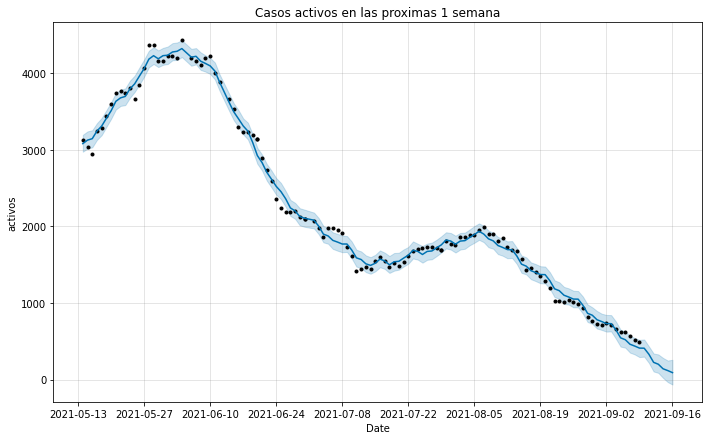

In [12]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'activos')
plt.title("Casos activos en las proximas 1 semana")

# Seasonality, Holiday Effects, And Regressors
Para un buen calculo de esto deberiamos tener datos de varios años.

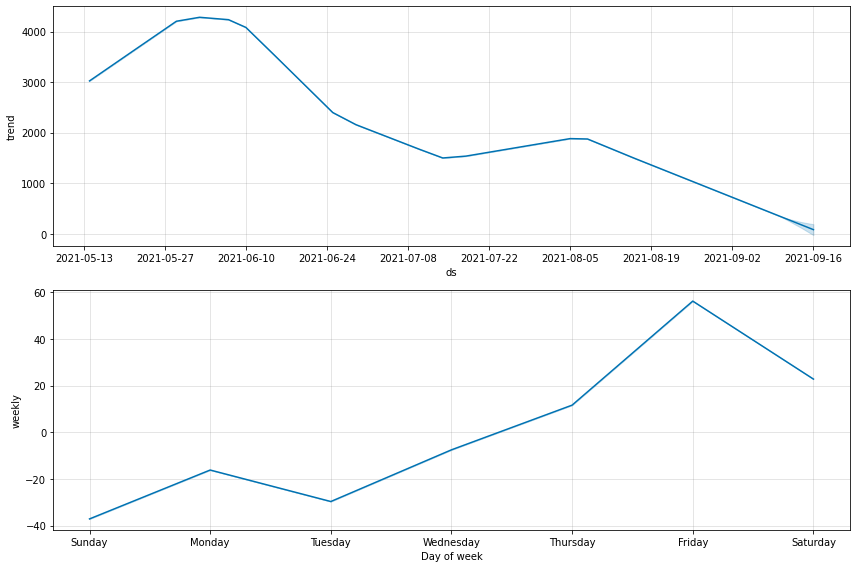

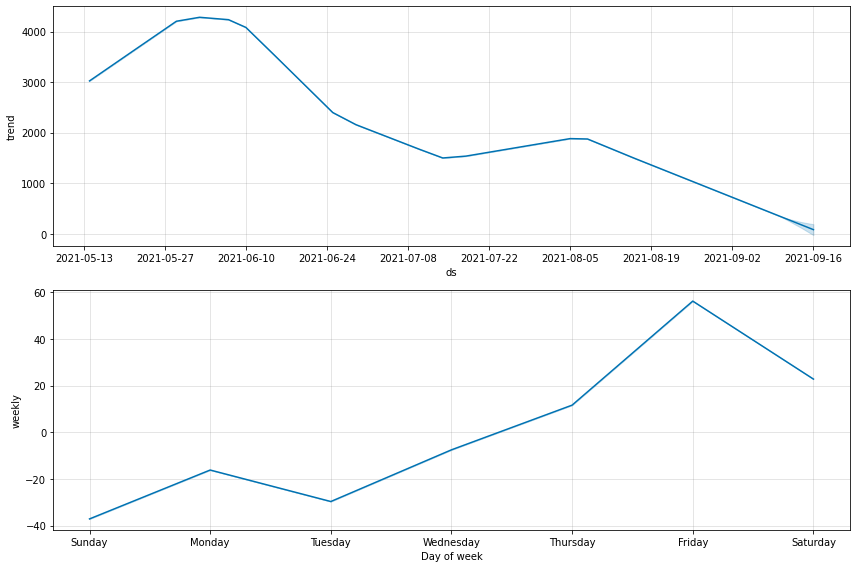

In [13]:
gm_prophet.plot_components(gm_forecast,figsize=(12,8))

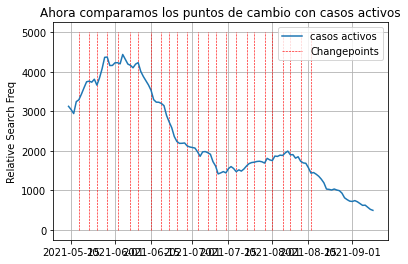

In [14]:
changepoints = [str(date) for date in gm_prophet.changepoints]
changepoints= pd.to_datetime(changepoints)

plt.plot(df_todo_train['ds'], df_todo_train['y'], label = 'casos activos')# Plot the changepoints
plt.vlines(changepoints, ymin = 0, ymax= 5000, colors = 'r', linewidth=0.6, linestyles = 'dashed', label = 'Changepoints')# Formatting of plot
plt.grid('off'); plt.ylabel('Relative Search Freq'); plt.legend()
plt.title('Ahora comparamos los puntos de cambio con casos activos');